## **MODEL OPTIMIZATION**

* Here I just look at the models which I already have and try to tune and optimize them to improve the results so we can have a better model for deployment

In [15]:
# loaing libraries for modelling
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import os 

In [16]:
# Load the data
df = pd.read_csv('/home/astrosanderson/Desktop/telecom-churn-prediction/data/processed/telecom_churn_processed.csv')

In [17]:
# Preview the data
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,-0.439916,1,0,-1.277445,0,1,0,0,...,0,0,0,0,0,1,2,-1.160323,2505,0
1,3962,1,-0.439916,0,0,0.066327,1,0,0,2,...,2,0,0,0,1,0,3,-0.259629,1466,0
2,2564,1,-0.439916,0,0,-1.236724,1,0,0,2,...,0,0,0,0,0,1,3,-0.362660,157,1
3,5535,1,-0.439916,0,0,0.514251,0,1,0,2,...,2,2,0,0,1,0,0,-0.746535,1400,0
4,6511,0,-0.439916,0,0,-1.236724,1,0,1,0,...,0,0,0,0,0,1,2,0.197365,925,1
5,6551,0,-0.439916,0,0,-0.992402,1,2,1,0,...,2,0,2,2,0,1,2,1.159546,6104,1
6,1002,1,-0.439916,0,1,-0.422317,1,2,1,0,...,0,0,2,0,0,1,1,0.808907,1550,0
7,4770,0,-0.439916,0,0,-0.910961,0,1,0,2,...,0,0,0,0,0,0,3,-1.163647,2609,0
8,5604,0,-0.439916,1,0,-0.177995,1,2,1,0,...,2,2,2,2,0,1,2,1.330711,2646,1
9,4534,1,-0.439916,0,1,1.206498,1,0,0,2,...,0,0,0,0,1,0,0,-0.286218,3022,0


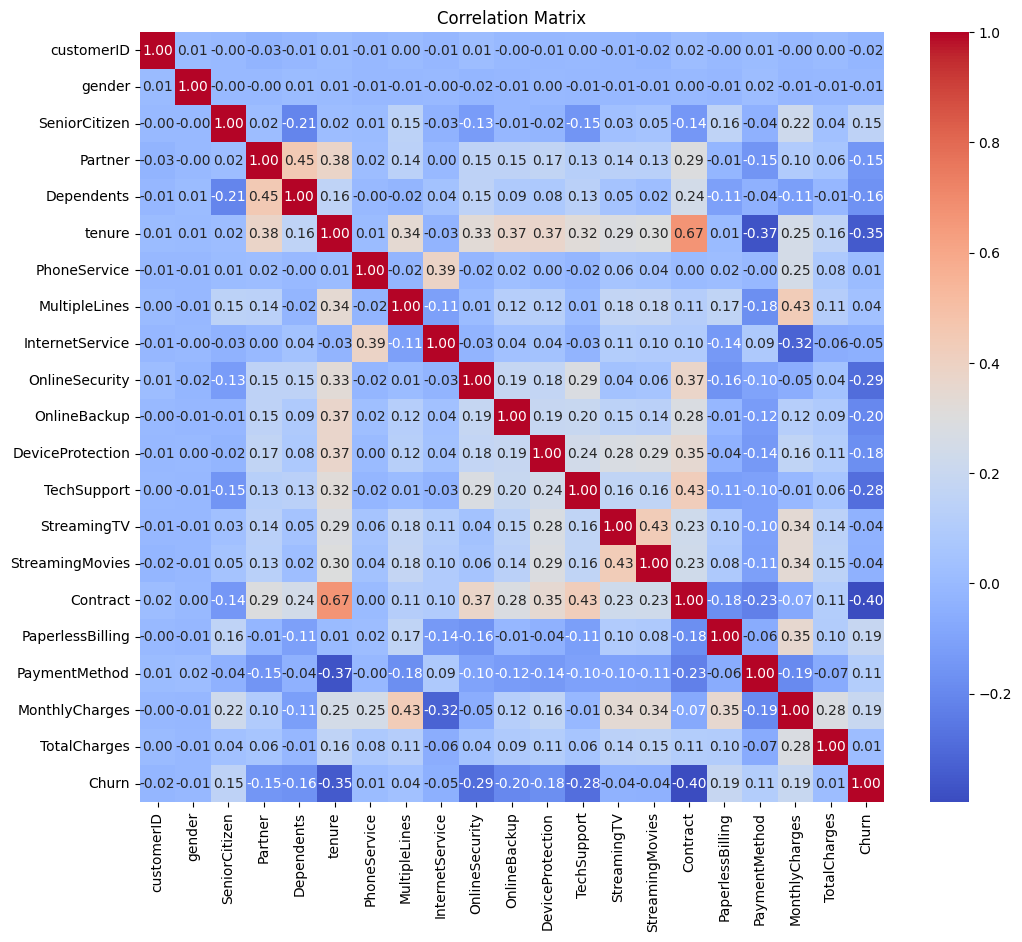

In [18]:
# Correlation matrix
plt.figure(figsize=(12,10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [19]:
# Column names
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [20]:
# droping columns with negative correlation with target variable 'Churn'
# df = df.drop(columns=['customerID', 'gender', 'Partner', 'Dependents', 'tenure', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
#        'StreamingTV', 'StreamingMovies', 'Contract', 'TotalCharges', 'MultipleLines', 'PhoneService'])

In [21]:
# Check the shape of the dataframe after dropping columns
df.shape

(7043, 21)

In [22]:
# Check the remaining columns
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

/home/astrosanderson/Desktop/telecom-churn-prediction/telecom/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Confusion Matrix:
[[942  94]
 [167 206]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1036
           1       0.69      0.55      0.61       373

    accuracy                           0.81      1409
   macro avg       0.77      0.73      0.75      1409
weighted avg       0.81      0.81      0.81      1409



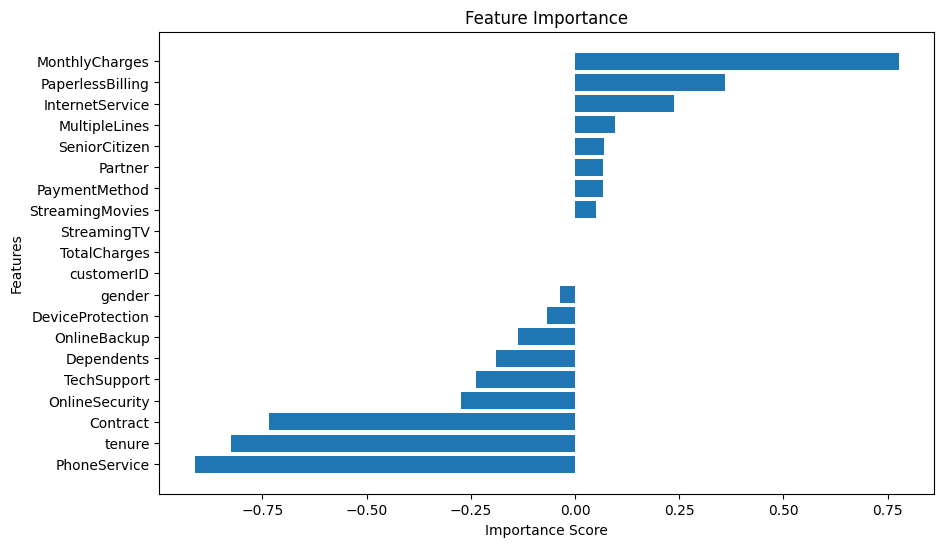

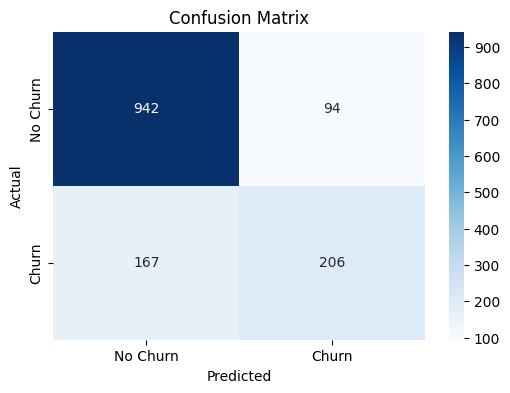

In [23]:
# Train the Logistic Regression Model
from sklearn.linear_model import LogisticRegression

X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# plot feature importance
importance = model.coef_[0]
features = X.columns
sorted_indices = np.argsort(importance)
plt.figure(figsize=(10,6))
plt.barh(range(len(sorted_indices)), importance[sorted_indices], align='center')
plt.yticks(range(len(sorted_indices)), [features[i] for i in sorted_indices])
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

# plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

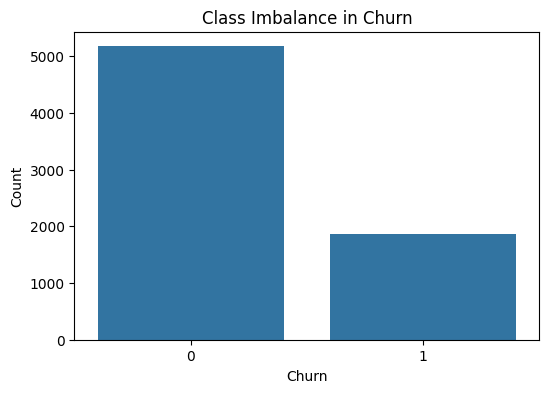

In [24]:
# Class imbalance visualization
plt.figure(figsize=(6,4))
sns.countplot(x='Churn', data=df)
plt.title('Class Imbalance in Churn')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

In [25]:
df['Churn'].value_counts(normalize=True)

Churn
0    0.73463
1    0.26537
Name: proportion, dtype: float64

In [27]:
# Hyperparameter tuning using GridSearchCV
from sklearn.model_selection import GridSearchCV

param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga'],
    'max_iter' : [1000, 2000, 3000]
}

grid_search = GridSearchCV(LogisticRegression(), param_grid = param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
print("Best parameters from GridSearchCV:", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)    
print("Classification Report for Best Model:")
print(classification_report(y_test, y_pred_best))


/home/astrosanderson/Desktop/telecom-churn-prediction/telecom/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/astrosanderson/Desktop/telecom-churn-prediction/telecom/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/astrosanderson/Desktop/telecom-churn-prediction/telecom/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/astrosanderson/Desktop/telecom-churn-prediction/telecom/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/astrosanderson/Desktop/telecom-churn-prediction/telecom/lib/python3.13/site-packages/sklea

Best parameters from GridSearchCV: {'C': 10, 'max_iter': 1000, 'penalty': 'l1', 'solver': 'liblinear'}
Classification Report for Best Model:
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1036
           1       0.68      0.56      0.61       373

    accuracy                           0.81      1409
   macro avg       0.77      0.73      0.75      1409
weighted avg       0.81      0.81      0.81      1409

